In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data

In [104]:
data = pd.read_csv("startup_funding.csv")

In [105]:
data.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical",
                        "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]

In [106]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [107]:
data

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,"4,500,000",NaN
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,"3,300,000",NaN
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,"6,000,000",NaN
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,"5,000,000",NaN
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,"18,000,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3004,3053,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
3005,3054,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
3006,3055,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
3007,3056,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [108]:
print("Size of the data: ",data.shape)

Size of the data:  (3009, 10)


## Data Cleaning

### Missing Data

In [109]:
# lets import warnings module
import warnings
warnings.filterwarnings('ignore')

In [110]:
total = data.isnull().sum().sort_values(ascending = False)

In [111]:
percentage = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)

In [112]:
missing_data = pd.concat([total,percentage],axis = 1,keys=['Total', 'Percent %'])

In [113]:
missing_data

,Total,Percent %
Remarks,2590,86.075108
AmountInUSD,960,31.904287
SubVertical,936,31.106680
City,180,5.982054
IndustryVertical,171,5.682951
InvestorsName,23,0.764374
InvestmentType,3,0.099701
SNo,0,0.000000
Date,0,0.000000
StartupName,0,0.000000


In [114]:
# lets remove Remarks column, as it contains a lot of nans, and high cardinal column
data = data.drop(['Remarks'],axis = 1)

In [115]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

In [116]:
data.shape

(3009, 9)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               3009 non-null   int64 
 1   Date              3009 non-null   object
 2   StartupName       3009 non-null   object
 3   IndustryVertical  2838 non-null   object
 4   SubVertical       2073 non-null   object
 5   City              2829 non-null   object
 6   InvestorsName     2986 non-null   object
 7   InvestmentType    3006 non-null   object
 8   AmountInUSD       2049 non-null   object
dtypes: int64(1), object(8)
memory usage: 211.7+ KB


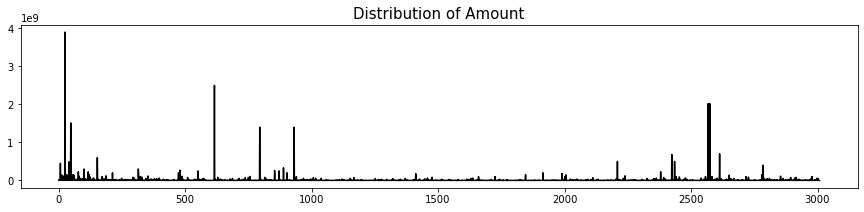

In [118]:
# lets convert the amount column into numerical, so that we can analyze the values inside it

# function to clean the AmounInUsd Column
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

# lets apply the function on the column
data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x: float(clean_amount(x)))

# lets check the head of the column after cleaning it
plt.rcParams['figure.figsize'] = (15, 3)
data['AmountInUSD'].plot(kind = 'line', color = 'black')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SNo               3009 non-null   int64  
 1   Date              3009 non-null   object 
 2   StartupName       3009 non-null   object 
 3   IndustryVertical  2838 non-null   object 
 4   SubVertical       2073 non-null   object 
 5   City              2829 non-null   object 
 6   InvestorsName     2986 non-null   object 
 7   InvestmentType    3006 non-null   object 
 8   AmountInUSD       3009 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 211.7+ KB


In [120]:
data

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.0
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000.0
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.0
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000.0
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000.0
...,...,...,...,...,...,...,...,...,...
3004,3053,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0
3005,3054,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0
3006,3055,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0
3007,3056,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,-999.0


In [121]:
## Cleaning the dates

data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

## How Does the Funding Ecosystem changes with respect to Time?

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201508     98
201606     98
201507     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


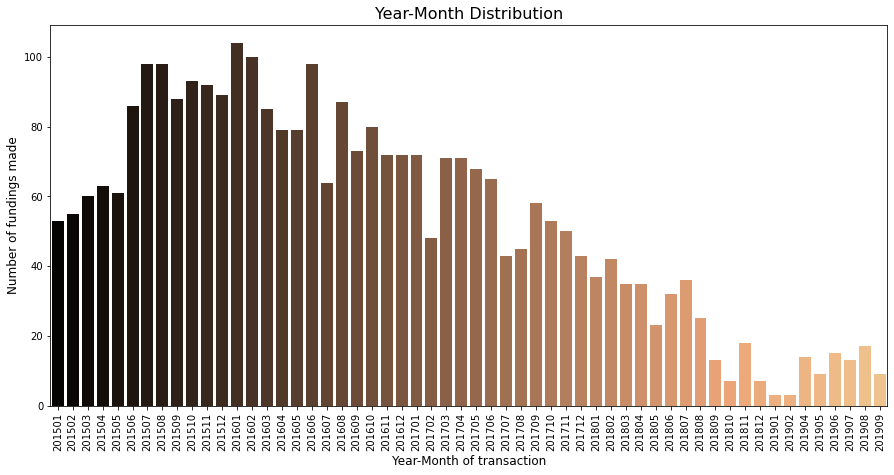

In [122]:
# some of the date formats are written wrongly so we have to clean them thoroughly so that we can analyze these values

# converting them into a Datetime object
data["yearmonth"] = (pd.to_datetime(data['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

## What is the General Amount that Startups get in India?

In [123]:
# lets check the Maximum funding of a startup
print("Maximum funding to a Startups is : ", data["AmountInUSD"].dropna().sort_values().max())

Maximum funding to a Startups is :  3900000000.0


In [124]:
# lets check out different ventures of Paytm
data[data.StartupName == 'Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
216,218,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
795,799,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1458,1482,30/8/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2424,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2855,2902,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,-9.990000e+02,201503
2913,2961,05/02/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,201502


In [125]:
# lets check out different ventures of Flipkart
data[data.StartupName == 'Flipkart']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
616,618,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,201708
738,741,26/06/2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07,201706
931,940,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703
997,1010,20/02/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07,201702
2654,2698,04/06/2015,Flipkart,eCommerce platform,NaN,Bangalore,Morgan Stanley,Private Equity,5.000000e+07,201506


In [126]:
# lets check the minimum funding in a startup
print("Minimum funding to a Startups is : ", data["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  -999.0


In [127]:
# lets check the startups with least funding
data[['AmountInUSD','StartupName']].sort_values(by = 'AmountInUSD', ascending = True).head(5)

,AmountInUSD,StartupName
1884,-999.0,Turtlemint
704,-999.0,Loanmeet
2043,-999.0,Little
1350,-999.0,PurpleDocs
1348,-999.0,JoeHukum


In [128]:
data[data['AmountInUSD'] == -999.0].shape

(965, 10)

In [129]:
# Average Funding
print("On Average indian startups got funding of : ", data["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  14979780.293120638


Total startups funded :  2439
Swiggy       8
Ola Cabs     8
Medinfi      6
UrbanClap    6
NoBroker     6
Nykaa        6
Meesho       6
Paytm        6
Jugnoo       5
Grofers      5
Name: StartupName, dtype: int64


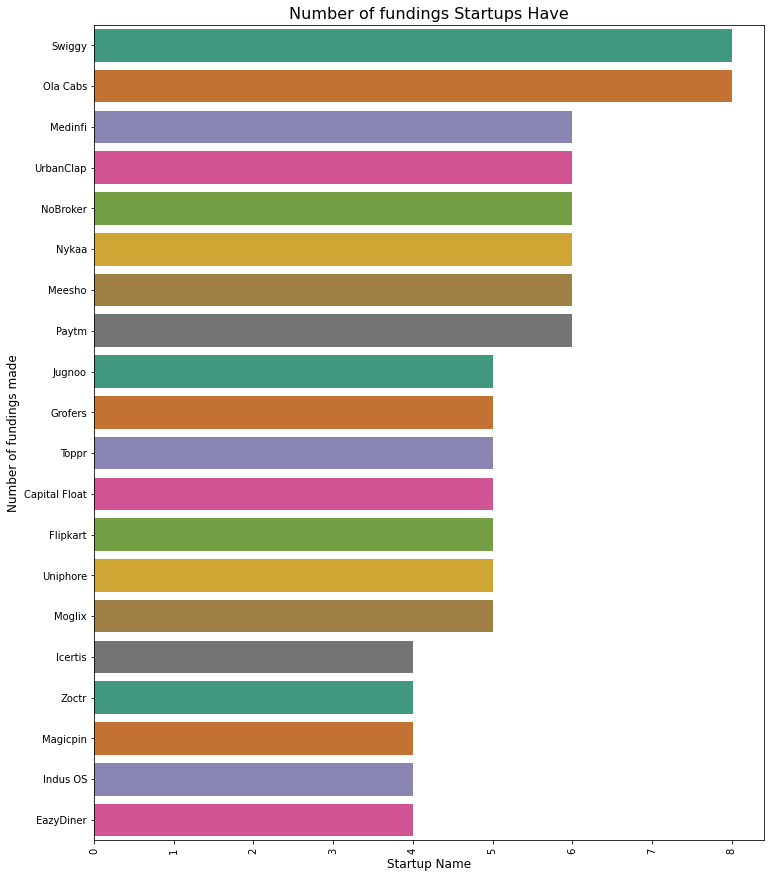

In [130]:
# lets check the no. of funding each startsup got

print("Total startups funded : ", len(data["StartupName"].unique()))
print(data["StartupName"].value_counts().head(10))
startupname = data['StartupName'].value_counts().head(20)

# lets plot the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

## Which Kind of Industries are more preferred for Startups?

Consumer Internet    941
Technology           476
eCommerce            186
Healthcare            69
Finance               61
ECommerce             61
Logistics             31
E-Commerce            25
Food & Beverage       23
Education             22
Name: IndustryVertical, dtype: int64


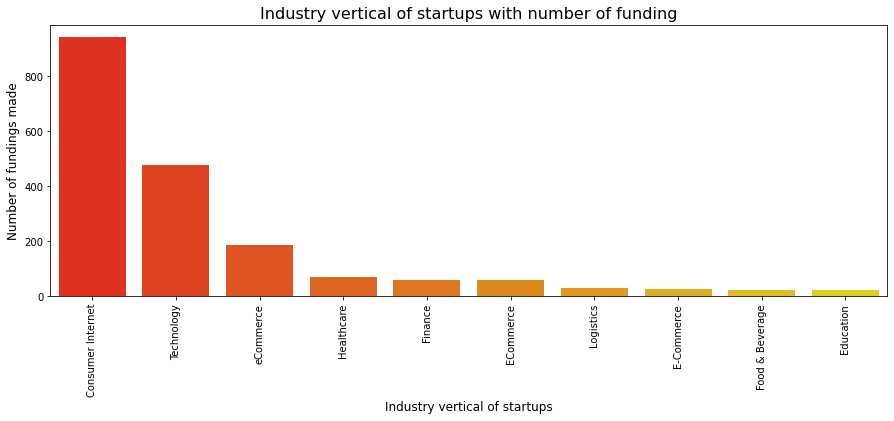

In [131]:
# lets analyze the Industry of the Startups

# data cleaning
data['IndustryVertical'] = data['IndustryVertical'].replace('nan', 'Consumer Technology')

industry = data['IndustryVertical'].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

Online Pharmacy                  10
Food Delivery Platform            8
Online Learning Platform          5
Online Lending                    5
Education                         5
Online Education Platform         5
Online lending platform           5
Online Food Delivery              4
ECommerce Marketplace             3
Online Insurance Aggregator       3
Logistics                         3
Online learning platform          3
Fitness Mobile App                3
Non-Banking Financial Company     3
SaaS                              3
Online Gifting platform           3
Agri-tech                         3
Online Insurance Platform         3
Data Analytics platform           3
B2B Marketplace                   3
Name: SubVertical, dtype: int64


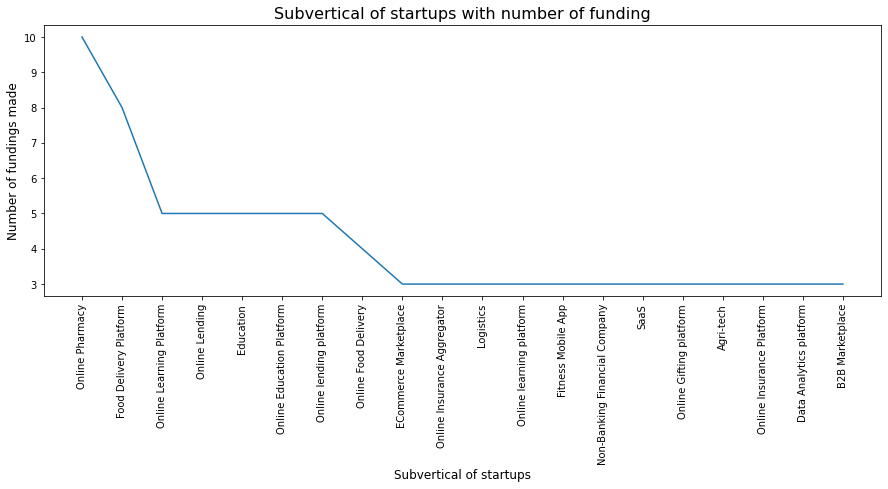

In [132]:
# lets analyze the sub vertical industries

industry = data['SubVertical'].value_counts()[1:].head(20)
print(industry)

# lets plot the data
sns.lineplot(industry.index, industry.values, palette = 'winter')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

## Does Location also play a role, In determining the Growth of a Startup?

Bangalore    832
Mumbai       564
New Delhi    420
Gurgaon      277
Pune         103
Hyderabad     99
Chennai       96
Noida         90
Gurugram      50
Ahmedabad     38
Name: City, dtype: int64


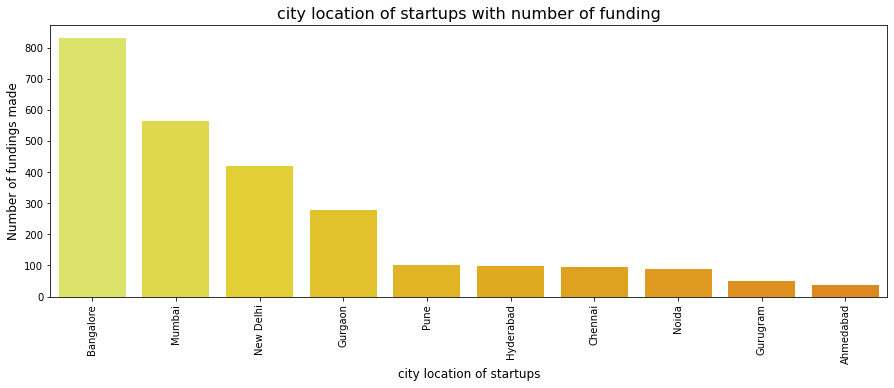

In [133]:
# analyzing the effect of Cities on a Startup

# lets clean the data for better analysis
data['City'] = data['City'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))

city = data['City'].value_counts().head(10)
print(city)

# lets plot the data
sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

## Who plays the main role in Indian Startups Ecosystem?

In [134]:
pip install wordcloud  

Note: you may need to restart the kernel to use updated packages.


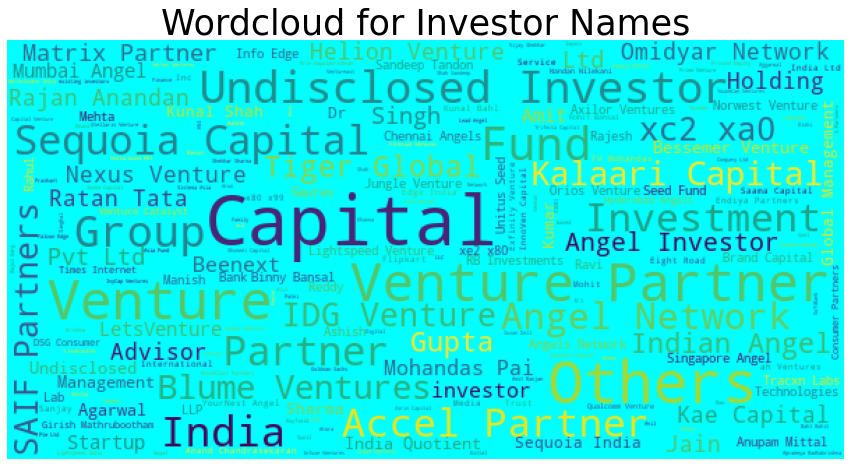

In [135]:
from wordcloud import WordCloud

names = data["InvestorsName"][~pd.isnull(data["InvestorsName"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

Undisclosed Investors       112
Ratan Tata                   25
Indian Angel Network         23
Kalaari Capital              16
Sequoia Capital              15
Group of Angel Investors     15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
RoundGlass Partners          10
Name: InvestorsName, dtype: int64


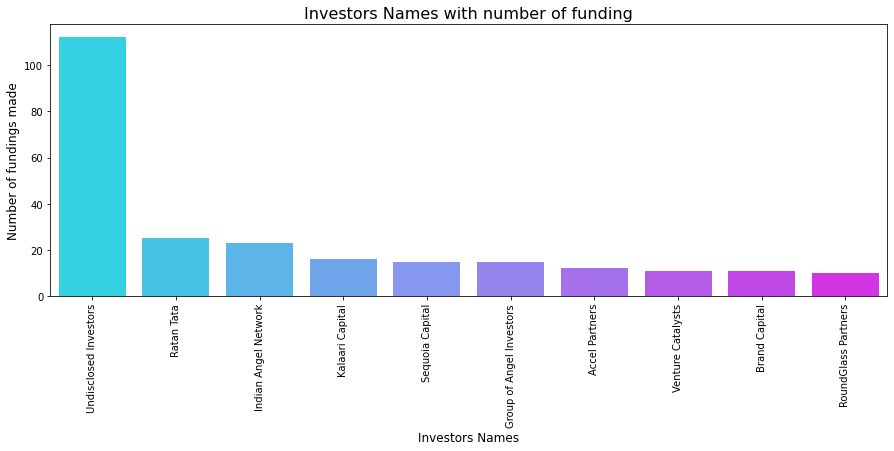

In [136]:
# lets analyze the investors on startups

# lets clean the dataset
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'nan'] = 'Undisclosed Investors'

# lets check the value counts
investors = data['InvestorsName'].value_counts().head(10)
print(investors)

# lets plot the data
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

## What are the different Types of Funding for Startups?

Private Equity          1356
Seed Funding            1353
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Seed/Angel Funding        23
Debt Funding              22
Series A                  22
Series B                  15
Series C                  11
Name: InvestmentType, dtype: int64


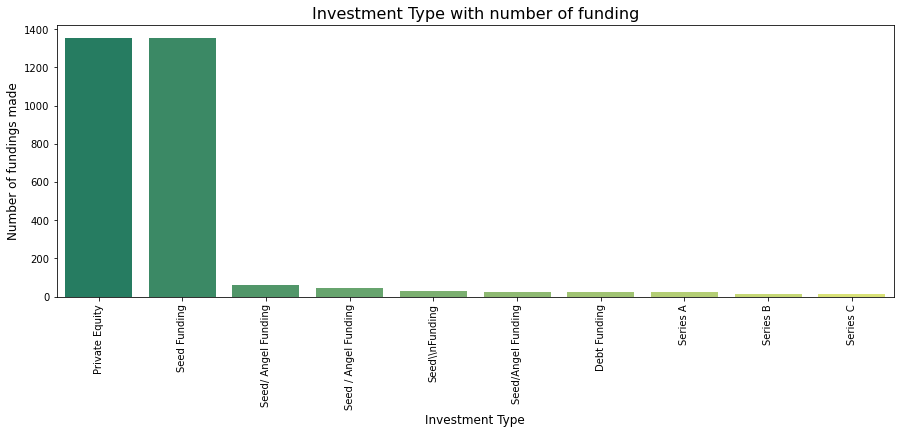

In [137]:
# lets analyze the investment
investment = data['InvestmentType'].value_counts().head(10)
print(investment)

# lets clean the dataset
data['InvestmentType'][data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
data['InvestmentType'][data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'

# lets plot the data
sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()